In [74]:
import pandas as pd
import sklearn.model_selection
import sklearn.tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, learning_curve, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

In [49]:
data = pd.read_csv('bank_data.csv', delimiter=';')

In [50]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [52]:
data.education.replace(('basic.6y','basic.9y', 'basic.4y'), ('basic'), inplace=True)

In [53]:
data = data.drop(['default'], axis=1)
#data = data.drop(columns=['day_of_week','month','contact','poutcome','pdays'],axis=1)

In [54]:
data.y.replace(('yes', 'no'), (1, 0), inplace=True)
data.housing.replace(('yes', 'no'), (1, 0), inplace=True)
data.loan.replace(('yes', 'no'), (1, 0), inplace=True)
data

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,1,0,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,1,0,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


C:\Users\muham\AppData\Local\Temp\ipykernel_16888\458572859.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

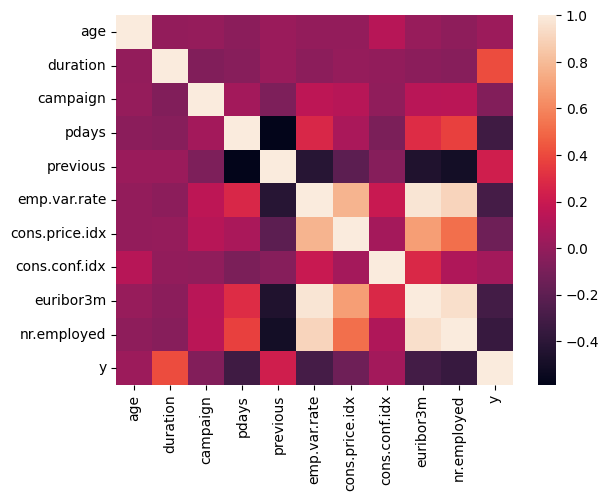

In [57]:
import seaborn as sns

sns.heatmap(data.corr())

In [58]:
df = pd.get_dummies(data)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [59]:
data=df.drop(columns=['job_unknown','marital_unknown','education_unknown'],axis=1)

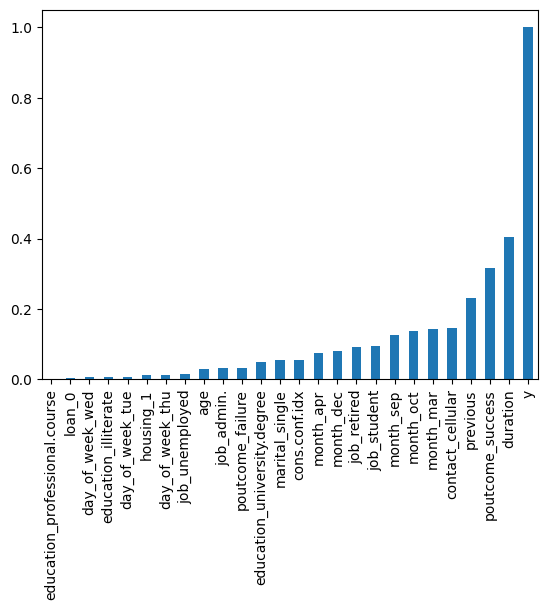

In [60]:
cor = data.corr()['y']
chart = cor[cor >= 0].sort_values(ascending=True).plot(kind='bar')


In [61]:
X_data = data.drop(['y'], axis=1 )

In [62]:
Y_data = data['y']
Y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, random_state = True)

In [64]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [82]:
def scores(model, actual, predicted):
    c_matrix = confusion_matrix(actual, predicted)
    f1 = f1_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    model_name = str(model).split('(')[0]
    if model_name == 'GradientBoostingClassifier':
        model_name = 'GradientBoosting'
    print(f'{model_name}\t\t{round(f1*100, 2)}\t\t{round(precision*100, 2)}\t\t{round(recall*100,2)}\t\t{round(accuracy*100,2)}')

In [83]:
lr_model = LogisticRegression()
edt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
gdt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
gb = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
rf = RandomForestClassifier(n_estimators = 50)

models = [lr_model, edt, gdt, gb, rf]

print('Model\t\t\t\tF1 Score\tPrecision\tRecall\t\tAccuracy')
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores(model,y_test, y_pred)
    #print(confusion_matrix(y_test, y_pred))

Model				F1 Score	Precision	Recall		Accuracy
LogisticRegression		52.11		66.09		43.0		91.06
DecisionTreeClassifier		52.71		51.96		53.48		89.14
DecisionTreeClassifier		53.68		52.32		55.11		89.24
GradientBoosting		25.02		81.9		14.76		89.99
RandomForestClassifier		54.74		66.3		46.61		91.28


RandomForestClassifier	54.56		65.62		46.7		91.2


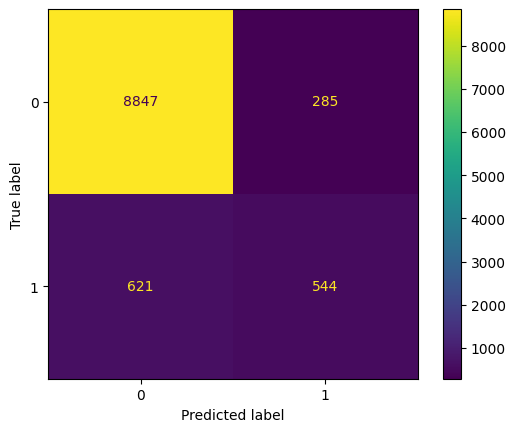

In [78]:
rf = RandomForestClassifier(n_estimators = 50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
scores(model,y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()